In [13]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-10-12 04:28:22,553: Credentials are already in use. The existing account in the session will be replaced.


In [14]:
from qiskit.visualization import plot_bloch_multivector
qc = QuantumCircuit(1)

In [15]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
stateVectorResult = result.get_statevector(qc)

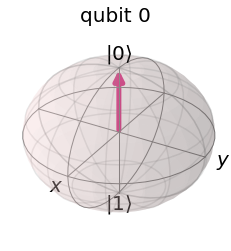

In [16]:
plot_bloch_multivector(stateVectorResult)

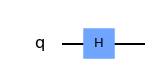

In [17]:
qc.h(0)
qc.draw()

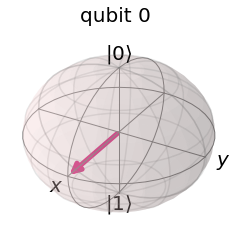

In [18]:
result = execute(qc, backend).result()
stateVectorResult = result.get_statevector(qc)
plot_bloch_multivector(stateVectorResult) #Rotates by pi/2 in +ve x-axis

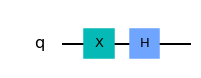

In [19]:
#Reset the circuit
qc = QuantumCircuit(1)
#Rotate the qubit from 0 to 1 using the X (NOT) gate
qc.x(0)
qc.h(0)
qc.draw()

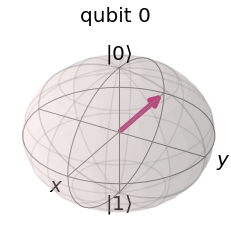

In [20]:
result = execute(qc, backend).result()
stateVectorResult = result.get_statevector(qc)
plot_bloch_multivector(stateVectorResult) #Rotates by pi/2 in -ve x-axis

In [21]:
#Reset circuit
qc = QuantumCircuit(1,1)
qc.h(0)

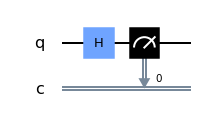

In [22]:
#Create a measurement circuit with 1 qubit and 1 bit
measurement_circuit = QuantumCircuit(1,1)
measurement_circuit.measure(0,0)
full_circuit = qc+measurement_circuit
full_circuit.draw()

In [24]:
backend = Aer.get_backend('qasm_simulator')
result = execute(full_circuit, backend, shots=8000).result()
counts = result.get_counts(full_circuit)
print(counts)

{'0': 3969, '1': 4031}


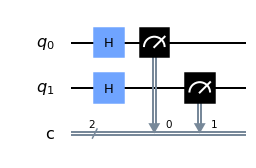

In [25]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.measure([0,1],[0,1])
qc.draw()

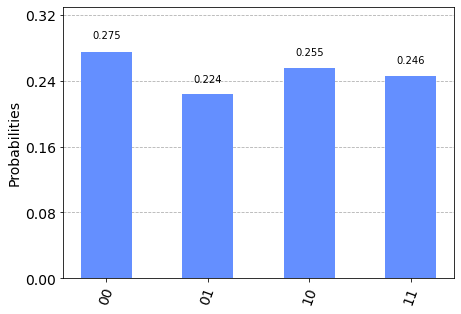

In [26]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

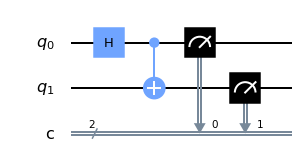

In [27]:
qc = QuantumCircuit(2,2)
qc.h(0)
#Add the CNOT gate to entangle the 2 qubits where the 1st qubit is the control
# and 2nd is target.
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw()

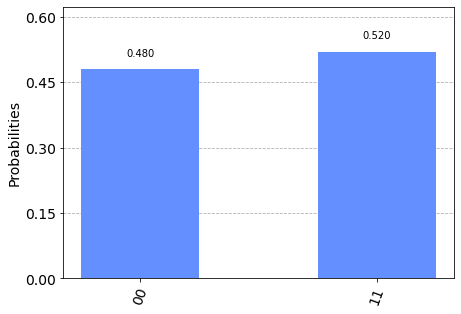

In [29]:
result = execute(qc, backend, shots=1000).result()
counts = result.get_counts(qc)
plot_histogram(counts)